<a href="https://colab.research.google.com/github/tanvi0605/Task2_TickTackToe/blob/main/fruit%26veg(1%2C6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  #upto 6
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit and vegetable recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3115 files belonging to 36 classes.


In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit and vegetable/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 341 files belonging to 36 classes.


In [7]:
cnn=tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [14]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 784s 7s/step - loss: 9.2345 - accuracy: 0.0427 - val_loss: 3.5045 - val_accuracy: 0.1026
Epoch 2/30
98/98 [==============================] - 112s 1s/step - loss: 4.1184 - accuracy: 0.0706 - val_loss: 3.2324 - val_accuracy: 0.1525
Epoch 3/30
98/98 [==============================] - 116s 1s/step - loss: 4.0447 - accuracy: 0.1136 - val_loss: 3.2927 - val_accuracy: 0.1466
Epoch 4/30
98/98 [==============================] - 126s 1s/step - loss: 3.5572 - accuracy: 0.1692 - val_loss: 2.5906 - val_accuracy: 0.3226
Epoch 5/30
98/98 [==============================] - 109s 1s/step - loss: 3.4233 - accuracy: 0.2164 - val_loss: 2.2592 - val_accuracy: 0.4370
Epoch 6/30
98/98 [==============================] - 108s 1s/step - loss: 3.3145 - accuracy: 0.2751 - val_loss: 2.6365 - val_accuracy: 0.3842
Epoch 7/30
98/98 [==============================] - 109s 1s/step - loss: 2.7308 - accuracy: 0.3429 - val_loss: 1.8221 - val_accuracy: 0.6217
Epoch 8/30
98

In [16]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
training_history.history

{'loss': [9.234529495239258,
  4.118383407592773,
  4.044748306274414,
  3.557243824005127,
  3.42325758934021,
  3.314539670944214,
  2.7308411598205566,
  2.677492141723633,
  2.471486806869507,
  2.0005667209625244,
  2.043030261993408,
  1.9969772100448608,
  1.6606190204620361,
  1.5394657850265503,
  1.4867039918899536,
  1.4215962886810303,
  1.2867934703826904,
  1.393733024597168,
  1.6379003524780273,
  1.2046198844909668,
  1.3239035606384277,
  1.1608598232269287,
  1.767710566520691,
  0.9869211912155151,
  0.8335448503494263,
  1.020937204360962,
  1.065496802330017,
  0.9886202812194824,
  0.8720728754997253,
  0.8410710096359253],
 'accuracy': [0.04269662871956825,
  0.07062600553035736,
  0.11364366114139557,
  0.16918137669563293,
  0.21637238562107086,
  0.2751203775405884,
  0.34285715222358704,
  0.4000000059604645,
  0.42375603318214417,
  0.48410916328430176,
  0.5223113894462585,
  0.5653290748596191,
  0.6205457448959351,
  0.6426966190338135,
  0.6651685237884

In [18]:
import json
with open('training_hist.json','w')as f:
 json.dump(training_history.history,f)

In [19]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 92.37536787986755 %


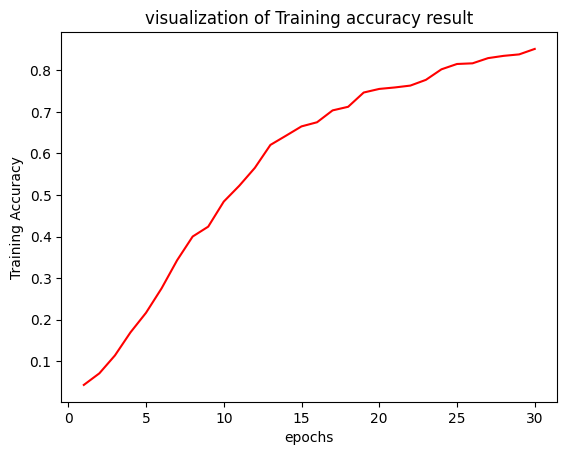

In [21]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('epochs')
plt.ylabel('Training Accuracy')
plt.title('visualization of Training accuracy result')
plt.show()

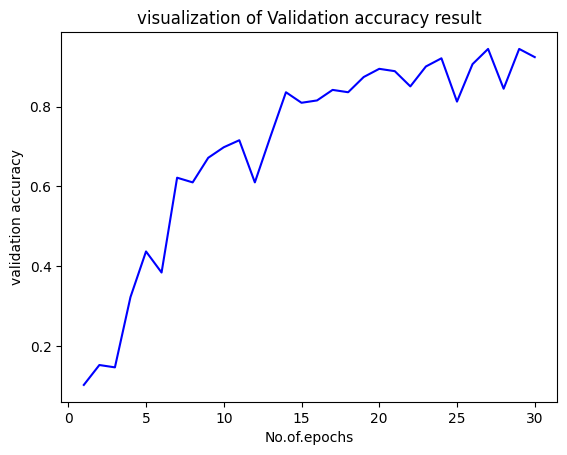

In [22]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No.of.epochs')
plt.ylabel('validation accuracy')
plt.title('visualization of Validation accuracy result')
plt.show()